<a href="https://colab.research.google.com/github/Akiinrinde/Cowrywise-Sentiment-Analysis-/blob/main/cowerywise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#install requirments
!pip install -q google-play-scraper
!pip install -q transformers
!pip install plotly.express
!pip install pyyaml
!pip install panel

In [5]:
# import libaries
import pandas as pd
import numpy as np
from google_play_scraper import app , Sort, reviews_all
import plotly.express as px
import panel as pnb

In [6]:
#scrape reviews from google play
cowrywise_project = reviews_all('com.cowrywise.android', sleep_milliseconds=0, lang='en', sort=Sort.NEWEST)
cowrywise_project

[{'reviewId': '24f81946-e8b3-4ecd-80de-df4b41d0bfc2',
  'userName': 'michael eki',
  'userImage': 'https://play-lh.googleusercontent.com/a-/ALV-UjVqoPhwuuH4WJU_L9_3OqV64zrx3rc5sf-gc99p14P_vA',
  'content': "The app is good. But what I really need is an option to deposit ANY amount on a daily basis towards a target. Please look into it. Plus authenticator verification not working. Asking for security questions when there's no possibility to create one",
  'score': 3,
  'thumbsUpCount': 19,
  'reviewCreatedVersion': '8.4.1',
  'at': datetime.datetime(2023, 10, 4, 12, 11, 12),
  'replyContent': 'Hi Michael, we already have these options. You can create a savings plan to lock funds in it and set it to save whenever you want or that we automatically deduct the amount you want to save on a daily basis. Check this video for how to do it https://youtu.be/EX_1T71Sz2g\nIf you have more questions, you may reach out to us at support@cowrywise.com',
  'repliedAt': datetime.datetime(2021, 12, 10, 11

In [7]:
df = pd.json_normalize(cowrywise_project)
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,24f81946-e8b3-4ecd-80de-df4b41d0bfc2,michael eki,https://play-lh.googleusercontent.com/a-/ALV-U...,The app is good. But what I really need is an ...,3,19,8.4.1,2023-10-04 12:11:12,"Hi Michael, we already have these options. You...",2021-12-10 11:59:56,8.4.1
1,02bc7746-5753-4dd2-b3c2-3685d59b4dcf,Adedeji Oluwatobi,https://play-lh.googleusercontent.com/a-/ALV-U...,"The app is very good , one thing I think shoul...",4,0,8.4.1,2023-10-04 07:38:36,"Thank you for the feedback, Adedeji. We haven'...",2023-10-04 07:49:27,8.4.1
2,cae96a4b-4ad3-4eb6-b89e-ea68553a737c,Grace Omaka,https://play-lh.googleusercontent.com/a-/ALV-U...,It really helps one to save,5,0,8.4.1,2023-10-04 07:27:55,Thank you for taking the time to give us your ...,2023-10-04 09:21:39,8.4.1
3,4f9dea0e-05c7-401f-aa1e-e67a1e500213,Francisca Nwagbo,https://play-lh.googleusercontent.com/a-/ALV-U...,I don't like the recent update of having to wa...,2,0,8.4.1,2023-10-03 23:39:04,"Hi Francisca, We’ve recently redesigned the wi...",2023-10-04 09:14:48,8.4.1
4,529b8f3c-9aa9-40eb-a704-c25ccb53119b,Precious Oluwapelumi,https://play-lh.googleusercontent.com/a/ACg8oc...,Amazing and really interactive.,4,0,8.3.2-beta,2023-10-03 09:39:27,Thank you for taking the time to provide us wi...,2023-10-03 12:01:06,8.3.2-beta


In [8]:
# what does the data look like?
print(df.size)
print(df.shape)


95909
(8719, 11)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8719 entries, 0 to 8718
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              8719 non-null   object        
 1   userName              8719 non-null   object        
 2   userImage             8719 non-null   object        
 3   content               8719 non-null   object        
 4   score                 8719 non-null   int64         
 5   thumbsUpCount         8719 non-null   int64         
 6   reviewCreatedVersion  7911 non-null   object        
 7   at                    8719 non-null   datetime64[ns]
 8   replyContent          6167 non-null   object        
 9   repliedAt             6167 non-null   datetime64[ns]
 10  appVersion            7911 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 749.4+ KB


In [10]:
#rename at column
df.rename(columns={'at': 'reviewedAt'},inplace=True)
df.head(5)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,reviewedAt,replyContent,repliedAt,appVersion
0,24f81946-e8b3-4ecd-80de-df4b41d0bfc2,michael eki,https://play-lh.googleusercontent.com/a-/ALV-U...,The app is good. But what I really need is an ...,3,19,8.4.1,2023-10-04 12:11:12,"Hi Michael, we already have these options. You...",2021-12-10 11:59:56,8.4.1
1,02bc7746-5753-4dd2-b3c2-3685d59b4dcf,Adedeji Oluwatobi,https://play-lh.googleusercontent.com/a-/ALV-U...,"The app is very good , one thing I think shoul...",4,0,8.4.1,2023-10-04 07:38:36,"Thank you for the feedback, Adedeji. We haven'...",2023-10-04 07:49:27,8.4.1
2,cae96a4b-4ad3-4eb6-b89e-ea68553a737c,Grace Omaka,https://play-lh.googleusercontent.com/a-/ALV-U...,It really helps one to save,5,0,8.4.1,2023-10-04 07:27:55,Thank you for taking the time to give us your ...,2023-10-04 09:21:39,8.4.1
3,4f9dea0e-05c7-401f-aa1e-e67a1e500213,Francisca Nwagbo,https://play-lh.googleusercontent.com/a-/ALV-U...,I don't like the recent update of having to wa...,2,0,8.4.1,2023-10-03 23:39:04,"Hi Francisca, We’ve recently redesigned the wi...",2023-10-04 09:14:48,8.4.1
4,529b8f3c-9aa9-40eb-a704-c25ccb53119b,Precious Oluwapelumi,https://play-lh.googleusercontent.com/a/ACg8oc...,Amazing and really interactive.,4,0,8.3.2-beta,2023-10-03 09:39:27,Thank you for taking the time to provide us wi...,2023-10-03 12:01:06,8.3.2-beta


In [11]:
# Generate a table of descriptive statistics
df.describe()

,score,thumbsUpCount
count,8719.000000,8719.000000
mean,4.079826,1.014910
std,1.394712,8.985804
min,1.000000,0.000000
25%,4.000000,0.000000
50%,5.000000,0.000000
75%,5.000000,0.000000
max,5.000000,439.000000


In [12]:
#dropping all the rows will null values
df2 = df.dropna()
print(df2.shape)

(5617, 11)


In [13]:
df2['reviewCreatedVersion'].value_counts()

7.2.2    649
6.8.1    367
8.0.1    343
7.1.7    312
7.1.6    309
        ... 
3.1.6      1
6.0.0      1
6.5.8      1
7.0.4      1
4.0.3      1
Name: reviewCreatedVersion, Length: 99, dtype: int64

App version 7.2.2 has the highest number of reviews given. Might have some insights into what the product got write or wrong.

In [14]:
#box plot showing score distrubtion
fig = px.box(df2, x = "score")
fig.show()

When you interact with the chart you will see that 1 is the minimum score given the first Quartile is 3 and most importantly that the median score given by the users is 5. This implies that a large % of users are satisfatied with the app.

In [15]:
# distribution of score
fig_hist = px.histogram(df2, title='Histogram of Scores', x= 'score')
fig_hist.show()


From this we know most users give the app a score of 5 stars. However 1 star reviews are still common.

In [16]:
df['score'].mean()

4.079825668081202

The average score given by users is 4. This means our assumption that most of the users are happy with the product is true.

#### Sentiment Analysis
Moving forward a pretrained deep learning model is going to be applied on the comments to see whether they are postive or negative.

In [17]:
#import transformer for sentiment analysis
from transformers import pipeline
sentiment_analysis = pipeline("sentiment-analysis",model="siebert/sentiment-roberta-large-english")

In [18]:
#take a small sample of the data to run senitment analysis
#covert content column to string and apply senitment analysis to it
#should have names the null free df has cleaned df instead of df2
sampled_df = df2.sample(n=500, replace=True)
sampled_df['content'] = sampled_df['content'].astype('str')

In [19]:
sampled_df['result'] = sampled_df['content'].apply(lambda x: sentiment_analysis(x))


In [20]:
sampled_df.head(10)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,reviewedAt,replyContent,repliedAt,appVersion,result
2428,10a24472-c848-4eb3-a6c0-88e77a087d67,Ugochukwu Eze,https://play-lh.googleusercontent.com/a/ACg8oc...,Excellent,5,0,8.0.2,2022-04-27 09:24:17,"Thank you, Ugochukwu. 💙 🎊\nIf you have any fee...",2022-05-04 15:22:51,8.0.2,"[{'label': 'POSITIVE', 'score': 0.998581051826..."
4993,4fc4fb2e-eb4d-4cf1-ae72-e6642b3f3cb6,gospel ozioma,https://play-lh.googleusercontent.com/a/ACg8oc...,Good,5,0,7.1.6,2021-07-08 19:40:57,"Thank you, Gospel 💙",2021-07-14 08:44:07,7.1.6,"[{'label': 'POSITIVE', 'score': 0.998415231704..."
3476,2460ecc7-c0b5-4c1a-9e26-0fb10ee8b427,Yahya Ahmad,https://play-lh.googleusercontent.com/a-/ALV-U...,good nd well comfortable,5,0,7.2.2,2022-01-19 12:22:59,"Thanks for the review, Ahmad",2022-01-27 09:51:34,7.2.2,"[{'label': 'POSITIVE', 'score': 0.998883306980..."
6508,df8d8054-752f-4f16-a5b4-eef9eb8c0b20,happy rollings,https://play-lh.googleusercontent.com/a-/ALV-U...,"My experience is superB,for the fact that i sa...",5,0,6.8.1,2020-09-02 22:07:03,"Thanks a lot for the review, Happy 💙",2020-09-04 11:15:57,6.8.1,"[{'label': 'POSITIVE', 'score': 0.998869001865..."
2513,ae096281-5ac8-45a3-89c4-3ad5063704fc,Timothy Emmanuel,https://play-lh.googleusercontent.com/a-/ALV-U...,good,1,0,7.2.2,2022-04-19 06:43:53,"Hi Timothy,\nHappy to hear that you find the a...",2022-04-19 09:01:16,7.2.2,"[{'label': 'POSITIVE', 'score': 0.998530626296..."
518,0b18368e-d09f-430c-9b58-b8b022303ed4,ilyas akintunde,https://play-lh.googleusercontent.com/a-/ALV-U...,A life saver✌️,5,0,8.2.0,2023-06-04 15:28:29,"We are pleased that you enjoy using the app, I...",2023-07-12 10:31:00,8.2.0,"[{'label': 'POSITIVE', 'score': 0.998648941516..."
6560,c5c3dc1c-3104-437b-b303-a8ca8a2f9f5d,Nwankwo Chisom,https://play-lh.googleusercontent.com/a-/ALV-U...,Good,5,0,6.5.9,2020-08-24 04:03:37,"Thank you, Chisom 💙",2020-08-24 12:03:04,6.5.9,"[{'label': 'POSITIVE', 'score': 0.998415231704..."
4232,a396fa1c-bdde-461e-87ac-ee87324b36bd,Gabriel Adeleye,https://play-lh.googleusercontent.com/a-/ALV-U...,it's good and perfect I can actually manage an...,5,0,7.1.9,2021-11-14 17:53:44,"Thanks for the review, Gabriel",2021-11-18 07:55:55,7.1.9,"[{'label': 'POSITIVE', 'score': 0.998772919178..."
3649,265a881a-56c7-4d01-ab09-6d049f5cb43c,Adedayo David,https://play-lh.googleusercontent.com/a-/ALV-U...,nice,5,0,7.2.2,2022-01-06 17:21:19,"Thank you, David",2022-01-06 23:39:38,7.2.2,"[{'label': 'POSITIVE', 'score': 0.997272908687..."
5475,30761007-a544-4ec2-979b-de65b9210925,Henrietta Okeke,https://play-lh.googleusercontent.com/a/ACg8oc...,"Great,awesome",4,0,7.0.0,2021-04-09 15:24:45,"Thank you, Henrietta 💙",2021-04-12 08:10:35,7.0.0,"[{'label': 'POSITIVE', 'score': 0.998531937599..."


In [21]:
sample_mean = sampled_df['score'].mean()
df_mean = df2['score'].mean()
print(sample_mean)
print(df_mean)

4.056
4.015844756987716


I checked both the mean for the sampled df and cleaned df (df2) to see if sampled df somewhat accurately represents the main df. However the proper methods of presicely determining if a sampled data set accurately represents the actual data set is not with in the scope of this project. What must the noted is the larger the sampled dataset the higher the chances of it accurately representing the actual dataset.

In [22]:
#slit the sentiment score and the sentiment into different columns
#note that the sentiment will either be negative or positive
sampled_df['sentiment'] = sampled_df['result'].apply(lambda x: (x[0]['label']))
sampled_df['sentiment_score'] = sampled_df['result'].apply(lambda x: (x[0]['score']))

In [23]:
#% of positive and negative sentiments
sampled_df['sentiment'].value_counts(normalize=True)

POSITIVE    0.79
NEGATIVE    0.21
Name: sentiment, dtype: float64

In [24]:
#plot histogram
fig = px.histogram(sampled_df, x='sentiment', color= 'sentiment')
fig.show()

Overall the positive sentiment surpass the negative sentiments. Postive sentiments makeup 74% of the reviews given while negative sentiments make up 26% of reviews given.  


In [25]:
#prep data for bar chart
sentiment_df =sampled_df.groupby(['score','sentiment']).count()[['reviewId']].reset_index()
sentiment_df

,score,sentiment,reviewId
0,1,NEGATIVE,55
1,1,POSITIVE,10
2,2,NEGATIVE,12
3,2,POSITIVE,10
4,3,NEGATIVE,12
5,3,POSITIVE,24
6,4,NEGATIVE,10
7,4,POSITIVE,64
8,5,NEGATIVE,16
9,5,POSITIVE,287


In [26]:
fig = px.bar(sentiment_df, x='score', y ='reviewId', color='sentiment', title='Sentiment Distribution by Rating',
             labels={'score': 'Rating', 'sentiment': 'Sentiment'})

fig.show()

The postive sentiment is highest on the score 5 which is the highest score a user can give the app. It is already clear that there is an overwhelming postive sentiment by the users. This proves that somemore. How users that give the score 3 have given mixed reviews and that should be subject to futher analysis.

In [27]:
#extract year and month a review was given
sampled_df['yearReview'] =sampled_df['reviewedAt'].dt.year
sampled_df['monthReview'] = sampled_df['reviewedAt'].dt.month
sampled_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,reviewedAt,replyContent,repliedAt,appVersion,result,sentiment,sentiment_score,yearReview,monthReview
2428,10a24472-c848-4eb3-a6c0-88e77a087d67,Ugochukwu Eze,https://play-lh.googleusercontent.com/a/ACg8oc...,Excellent,5,0,8.0.2,2022-04-27 09:24:17,"Thank you, Ugochukwu. 💙 🎊\nIf you have any fee...",2022-05-04 15:22:51,8.0.2,"[{'label': 'POSITIVE', 'score': 0.998581051826...",POSITIVE,0.998581,2022,4
4993,4fc4fb2e-eb4d-4cf1-ae72-e6642b3f3cb6,gospel ozioma,https://play-lh.googleusercontent.com/a/ACg8oc...,Good,5,0,7.1.6,2021-07-08 19:40:57,"Thank you, Gospel 💙",2021-07-14 08:44:07,7.1.6,"[{'label': 'POSITIVE', 'score': 0.998415231704...",POSITIVE,0.998415,2021,7
3476,2460ecc7-c0b5-4c1a-9e26-0fb10ee8b427,Yahya Ahmad,https://play-lh.googleusercontent.com/a-/ALV-U...,good nd well comfortable,5,0,7.2.2,2022-01-19 12:22:59,"Thanks for the review, Ahmad",2022-01-27 09:51:34,7.2.2,"[{'label': 'POSITIVE', 'score': 0.998883306980...",POSITIVE,0.998883,2022,1
6508,df8d8054-752f-4f16-a5b4-eef9eb8c0b20,happy rollings,https://play-lh.googleusercontent.com/a-/ALV-U...,"My experience is superB,for the fact that i sa...",5,0,6.8.1,2020-09-02 22:07:03,"Thanks a lot for the review, Happy 💙",2020-09-04 11:15:57,6.8.1,"[{'label': 'POSITIVE', 'score': 0.998869001865...",POSITIVE,0.998869,2020,9
2513,ae096281-5ac8-45a3-89c4-3ad5063704fc,Timothy Emmanuel,https://play-lh.googleusercontent.com/a-/ALV-U...,good,1,0,7.2.2,2022-04-19 06:43:53,"Hi Timothy,\nHappy to hear that you find the a...",2022-04-19 09:01:16,7.2.2,"[{'label': 'POSITIVE', 'score': 0.998530626296...",POSITIVE,0.998531,2022,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5555,a5e763ac-300b-45bf-95c7-cef1c2c727e3,Iriemi Blexing,https://play-lh.googleusercontent.com/a/ACg8oc...,"Beautiful way to save, but still think u can i...",4,0,7.0.2,2021-03-30 15:49:11,"Thank you, Iriemi 💙. The interest rates on our...",2021-04-01 20:04:00,7.0.2,"[{'label': 'POSITIVE', 'score': 0.998868644237...",POSITIVE,0.998869,2021,3
2452,79a967de-6bd0-4586-8d56-e71f2a7bc44e,Uche Kingsley Ogbonna,https://play-lh.googleusercontent.com/a-/ALV-U...,Very efficient banking services. Highly recomm...,5,0,7.1.8,2022-04-25 10:19:07,"Thank you very much for your feedback, Uche. 💙 🎊",2022-04-25 16:37:29,7.1.8,"[{'label': 'POSITIVE', 'score': 0.998897910118...",POSITIVE,0.998898,2022,4
2267,1b93403a-1e0f-40bc-aad7-f140c5a638a0,Loki OfAsgard,https://play-lh.googleusercontent.com/a-/ALV-U...,exactly what i needed,5,0,8.0.2,2022-05-21 08:15:27,Yayyy! Thank you so much. 🎉 🎊\n\n,2022-05-28 11:07:39,8.0.2,"[{'label': 'POSITIVE', 'score': 0.998565495014...",POSITIVE,0.998565,2022,5
2418,172b316a-78cb-4129-8fad-bbd95035d2a2,Are Saint lynyard,https://play-lh.googleusercontent.com/a/ACg8oc...,it's a very great app and do all it says,5,0,8.0.2,2022-04-28 06:51:30,"Hi Saint, thank you very much for your feedbac...",2022-05-04 15:01:31,8.0.2,"[{'label': 'POSITIVE', 'score': 0.998885452747...",POSITIVE,0.998885,2022,4


In [28]:
# prepping data for line chart
year_df =sampled_df.groupby(['yearReview','sentiment']).count()[['reviewId']].reset_index()
year_df

,yearReview,sentiment,reviewId
0,2018,NEGATIVE,3
1,2018,POSITIVE,3
2,2019,NEGATIVE,2
3,2019,POSITIVE,4
4,2020,NEGATIVE,11
5,2020,POSITIVE,74
6,2021,NEGATIVE,33
7,2021,POSITIVE,155
8,2022,NEGATIVE,35
9,2022,POSITIVE,116


In [29]:
line_fig = px.line(year_df, x="yearReview", y="reviewId", color='sentiment')
line_fig.show()

It is importance to note that since its launch cowrywise has always had positive reviews that far surpasses the negative reviews. We see a steady raise in both negative and postive reviews over the years. We can assume that the steady raise of both types of sentiments can be attributed to the growth in the apps user base over the years.

However there is noticable high point in 2021 for both postive and negative reviews. This data is limited and has such can't be used to determine exactly why it happened. We can assume a succesful marketing campaign or a launch of a new version of the app that was wildly received.

In [30]:
#checking the reviews sentiment in 2021

mask = sampled_df['yearReview'] == 2021
df_2021 = sampled_df[mask]
version_df_2021 =df_2021.groupby(['appVersion','sentiment']).count()[['reviewId']].reset_index()

In [31]:
bar_fig2 = px.bar(version_df_2021, x='appVersion', y ='reviewId', color='sentiment', title='Sentiment Distribution by App Version (2021)',
             labels={'score': 'Rating', 'sentiment': 'Sentiment'})

bar_fig2.show()

In 2021, 20 versions of the app was realeased and version 7.1.7 had the highest number of reviews. This version has the highest amount of postive reviews of all the versions realeased in 2021. While it does have the second highest negative reviewed of all the versions. We shall look into this.

In [32]:
# filter to get all postive comments on version 7.1.7
mask = (df_2021['appVersion'] == '7.1.7') & (df_2021['sentiment'] == 'POSITIVE')
postive_2021_df = df_2021[mask]

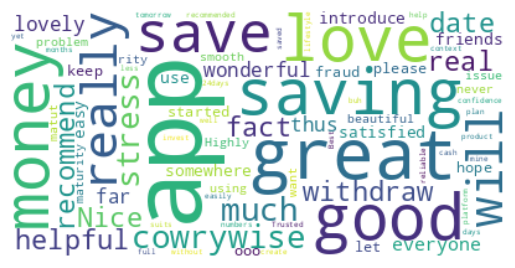

In [33]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Create stopword list:
stopwords = set(STOPWORDS)

text = " ".join(review for review in postive_2021_df.content)


# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


Looking at the word cloud generated from the positive comments from version 7.1.7 we see words like love, good, great, easy, best and saving. The users are clearly very happy with the app and its helps them meet their saving goals.

In [34]:
# filter to get all negative comments on version 7.1.7
mask = (df_2021['appVersion'] == '7.1.7') & (df_2021['sentiment'] == 'NEGATIVE')
negative_2021_df = df_2021[mask]

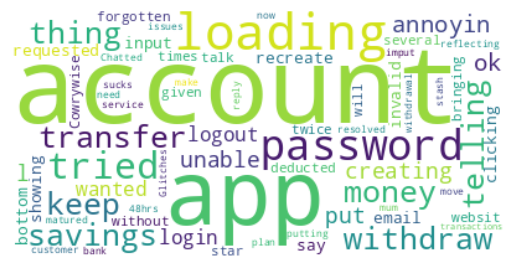

In [35]:
# Create stopword list:
stopwords = set(STOPWORDS)

text = " ".join(review for review in negative_2021_df.content)


# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


The words generated in the negative review word cloud include money, never, withdraw, support, error, just to state a few. It can be assumed that some users were having problems while trying to withdraw money from their accounts or needed to talk to a support staff. It is clear that problems these users faced greatly affected their expereince with the app.

In [36]:
# prep for months and sentiment line chart
month_df = df_2021.groupby(['monthReview','sentiment']).count()[['reviewId']].reset_index()
month_df

,monthReview,sentiment,reviewId
0,1,NEGATIVE,3
1,1,POSITIVE,7
2,2,NEGATIVE,1
3,2,POSITIVE,12
4,3,NEGATIVE,4
5,3,POSITIVE,14
6,4,NEGATIVE,2
7,4,POSITIVE,14
8,5,NEGATIVE,3
9,5,POSITIVE,9


In [37]:
#line chart of sentiments over months in 2021
line_fig2 = px.line(month_df, x="monthReview", y="reviewId", color='sentiment')
line_fig2.show()

In [38]:
#sentiment over months for year 2021
fig_bar = px.bar(month_df, x='monthReview', y ='reviewId', color='sentiment', title='Sentiment Distribution by Month (2021)',
             labels={'monthReview': 'Month', 'sentiment': 'Sentiment'})

fig_bar.show()

Looking the distribution of postive and negative it is clear that there are far more postive reviews then negative across the year. The conclusion that a majority of the users are happy with the app still stands

In [39]:
#checking the reviews sentiment by the lastest app versions. ie year 2023

mask = sampled_df['yearReview'] == 2023
df_2023 = sampled_df[mask]

version_df =df_2023.groupby(['appVersion','sentiment']).count()[['reviewId']].reset_index()
version_df

,appVersion,sentiment,reviewId
0,8.1.1,POSITIVE,1
1,8.1.3,POSITIVE,1
2,8.1.5,NEGATIVE,2
3,8.1.6,NEGATIVE,1
4,8.1.6,POSITIVE,3
5,8.1.7,NEGATIVE,2
6,8.1.7,POSITIVE,3
7,8.1.9,NEGATIVE,1
8,8.1.9,POSITIVE,1
9,8.2.0,NEGATIVE,1


In [40]:
bar_fig2 = px.bar(version_df, x='appVersion', y ='reviewId', color='sentiment', title='Sentiment Distribution by App Version',
             labels={'score': 'Rating', 'sentiment': 'Sentiment'})

bar_fig2.show()

Version 8.3.2 stands out with its high number of both positive and negative reviews for the year 2023

In [45]:
mask = (df_2023['appVersion'] == '8.3.2') & (df_2023['sentiment'] == 'POSITIVE')
positive_2023_df = df_2023[mask]

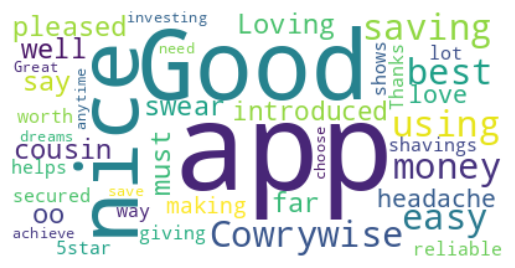

In [46]:
stopwords = set(STOPWORDS)

text = " ".join(review for review in positive_2023_df.content)


# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


Just like with the postive comments in 2021, 2023 positive reviews have words like good, nice, easy, 5 star, love and save. Clearly the users are very happy with the happy.

In [47]:
mask = (df_2023['appVersion'] == '8.3.2') & (df_2023['sentiment'] == 'NEGATIVE')
negative_2023_df = df_2023[mask]

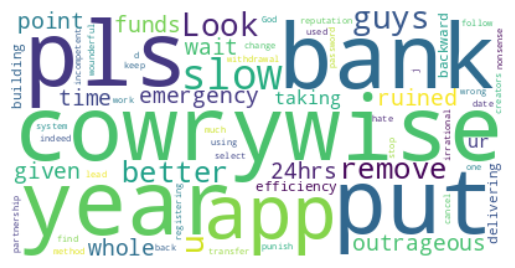

In [48]:
stopwords = set(STOPWORDS)

text = " ".join(review for review in negative_2023_df.content)


# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In the negative reviews we see words like "pls' which means please, bank, emergency, outrageous. It can be assumed that these problems stem from issues with withdrawing money. From a very nigerian point of view it might just be a lot of users are in an emergency and need to access their saving. However strict policies at cowrywise will prevent that from happening.

### Insights


*   Since its launch cowrywise has had for more postive reviews than negative.
*   74% of reviews given a postive while only 26% are negative
*   since launch the year 2021 has the highest number of reviews given.
*   In 2021 the product team realeased 20 versions of the app
*   While in 2023 the product tea realeased 13 versions of the app
*   The positive reviews point at the fact that cowrywise is intuitively desgined making it easy to use.
*   Users also believe the app is good and has helped them reach their saving goals
*   Negative reviews center around withdrawal of funds and instances were users need access to their savings before it's maturity date. I would advice that marketing team do more in rasing awareness on the policies surrounding maturity dates. On the product side the team could experiment with flexable withdrawal dates or less strict policies on maturity dates.








